In [1]:
MODEL_NAME = 'ResNet'

In [2]:
import numpy as np
import csv
# from tqdm.notebook import tqdm
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

from model import Network, SimpleNET, ResNet

if MODEL_NAME == 'ResNet':
    from config.ResNet_config import *
else:
    from config.baseline_config import *
    
from augmentation import transforms_0
from train import train

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
trainset = datasets.ImageFolder('/dtu/datasets1/02514/hotdog_nothotdog/train', transform=transforms_0)
train_loader = DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True, num_workers=1)

testset = datasets.ImageFolder('/dtu/datasets1/02514/hotdog_nothotdog/test', transform=transforms_0)
test_loader = DataLoader(testset, batch_size=BATCH_SIZE, shuffle=False, num_workers=1)

In [4]:
if MODEL_NAME == 'ResNet':
    model = eval(MODEL_NAME)(n_features=CONV_SIZE, num_res_blocks=NUM_BLOCKS)
else:
    model = eval(MODEL_NAME)()
    
model.to(device)

# Save the initial parameters so all optimizers work on the same network
init_param = model.state_dict()
model.load_state_dict(init_param)

loss = nn.BCELoss()
# v1
optim_sgd = torch.optim.SGD(model.parameters(), lr=0.01, momentum = 0.9)
optim_adam = torch.optim.Adam(model.parameters(), lr=0.001)
optim_adagrad = torch.optim.Adagrad(model.parameters(), lr=0.01)
optim_adadelta = torch.optim.Adadelta(model.parameters())

# v2
#optim_sgd = torch.optim.SGD(model.parameters(), lr=0.1, momentum = 0.9)
#optim_adam = torch.optim.Adam(model.parameters(), lr=0.01)
#optim_adagrad = torch.optim.Adagrad(model.parameters(), lr=0.1)
#optim_adadelta = torch.optim.Adadelta(model.parameters())

#lr_scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer=optimizer, gamma=DECAY_RATE)

In [5]:
result_dicts = []
#for optimizer in [optim_sgd, optim_adam, optim_adagrad, optim_adadelta]:
for optimizer in tqdm([optim_sgd, optim_adam, optim_adagrad, optim_adadelta], total=4, unit='optimizer'):
    print(f"Training with {optimizer}")
    result_dicts.append(train(model, train_loader, test_loader, loss, optimizer, NUM_EPOCHS))
    model.load_state_dict(init_param)

  0%|          | 0/4 [00:00<?, ?optimizer/s]

Training with SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.1
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)


  0%|          | 0/20 [00:00<?, ?epoch/s]

  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.700	 test: 0.700	 Accuracy train: 51.8%	 test: 48.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.702	 test: 0.701	 Accuracy train: 49.5%	 test: 48.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.699	 test: 0.703	 Accuracy train: 50.5%	 test: 48.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.697	 test: 0.697	 Accuracy train: 51.7%	 test: 48.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.695	 test: 0.700	 Accuracy train: 50.9%	 test: 48.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.696	 test: 0.696	 Accuracy train: 51.9%	 test: 48.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.695	 test: 0.700	 Accuracy train: 51.4%	 test: 48.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.697	 test: 0.696	 Accuracy train: 51.1%	 test: 48.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.697	 test: 0.705	 Accuracy train: 50.1%	 test: 48.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.695	 test: 0.693	 Accuracy train: 52.0%	 test: 48.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.696	 test: 0.693	 Accuracy train: 51.0%	 test: 48.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.693	 test: 0.700	 Accuracy train: 52.1%	 test: 48.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.694	 test: 0.696	 Accuracy train: 51.1%	 test: 48.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.696	 test: 0.695	 Accuracy train: 50.2%	 test: 48.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.695	 test: 0.699	 Accuracy train: 51.0%	 test: 48.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.693	 test: 0.693	 Accuracy train: 52.8%	 test: 51.9%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.694	 test: 0.704	 Accuracy train: 50.9%	 test: 48.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.694	 test: 0.698	 Accuracy train: 49.7%	 test: 48.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.693	 test: 0.693	 Accuracy train: 53.5%	 test: 48.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.694	 test: 0.703	 Accuracy train: 50.6%	 test: 48.1%
Training with Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    weight_decay: 0
)


  0%|          | 0/20 [00:00<?, ?epoch/s]

  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.693	 test: 0.698	 Accuracy train: 51.6%	 test: 48.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.694	 test: 0.699	 Accuracy train: 52.4%	 test: 48.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.693	 test: 0.697	 Accuracy train: 52.5%	 test: 48.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.693	 test: 0.698	 Accuracy train: 50.5%	 test: 48.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.692	 test: 0.699	 Accuracy train: 52.5%	 test: 48.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.692	 test: 0.698	 Accuracy train: 52.5%	 test: 48.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.692	 test: 0.698	 Accuracy train: 52.5%	 test: 48.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.693	 test: 0.698	 Accuracy train: 52.5%	 test: 48.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.692	 test: 0.698	 Accuracy train: 52.5%	 test: 48.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.692	 test: 0.698	 Accuracy train: 52.5%	 test: 48.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.693	 test: 0.698	 Accuracy train: 52.4%	 test: 48.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.692	 test: 0.698	 Accuracy train: 52.5%	 test: 48.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.692	 test: 0.698	 Accuracy train: 52.5%	 test: 48.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.692	 test: 0.697	 Accuracy train: 52.5%	 test: 48.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.692	 test: 0.697	 Accuracy train: 52.8%	 test: 48.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.693	 test: 0.697	 Accuracy train: 52.3%	 test: 48.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.692	 test: 0.699	 Accuracy train: 52.5%	 test: 48.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.692	 test: 0.698	 Accuracy train: 52.5%	 test: 48.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.692	 test: 0.698	 Accuracy train: 52.5%	 test: 48.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.693	 test: 0.700	 Accuracy train: 52.5%	 test: 48.1%
Training with Adagrad (
Parameter Group 0
    differentiable: False
    eps: 1e-10
    foreach: None
    initial_accumulator_value: 0
    lr: 0.1
    lr_decay: 0
    maximize: False
    weight_decay: 0
)


  0%|          | 0/20 [00:00<?, ?epoch/s]

  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.695	 test: 0.709	 Accuracy train: 52.8%	 test: 48.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.693	 test: 0.700	 Accuracy train: 51.5%	 test: 48.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.693	 test: 0.694	 Accuracy train: 52.5%	 test: 48.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.693	 test: 0.694	 Accuracy train: 52.5%	 test: 48.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.692	 test: 0.699	 Accuracy train: 51.7%	 test: 48.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.692	 test: 0.695	 Accuracy train: 52.5%	 test: 48.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.692	 test: 0.698	 Accuracy train: 52.5%	 test: 48.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.692	 test: 0.697	 Accuracy train: 52.5%	 test: 48.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.692	 test: 0.698	 Accuracy train: 52.5%	 test: 48.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.692	 test: 0.698	 Accuracy train: 52.5%	 test: 48.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.692	 test: 0.698	 Accuracy train: 52.5%	 test: 48.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.692	 test: 0.697	 Accuracy train: 52.5%	 test: 48.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.692	 test: 0.698	 Accuracy train: 52.5%	 test: 48.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.692	 test: 0.698	 Accuracy train: 52.5%	 test: 48.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.692	 test: 0.697	 Accuracy train: 52.5%	 test: 48.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.692	 test: 0.698	 Accuracy train: 52.5%	 test: 48.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.692	 test: 0.698	 Accuracy train: 52.5%	 test: 48.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.692	 test: 0.698	 Accuracy train: 52.5%	 test: 48.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.692	 test: 0.698	 Accuracy train: 52.5%	 test: 48.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.692	 test: 0.699	 Accuracy train: 52.5%	 test: 48.1%
Training with Adadelta (
Parameter Group 0
    differentiable: False
    eps: 1e-06
    foreach: None
    lr: 1.0
    maximize: False
    rho: 0.9
    weight_decay: 0
)


  0%|          | 0/20 [00:00<?, ?epoch/s]

  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.692	 test: 0.698	 Accuracy train: 52.5%	 test: 48.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.692	 test: 0.698	 Accuracy train: 52.5%	 test: 48.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.692	 test: 0.698	 Accuracy train: 52.5%	 test: 48.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.692	 test: 0.698	 Accuracy train: 52.5%	 test: 48.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.692	 test: 0.698	 Accuracy train: 52.5%	 test: 48.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.692	 test: 0.698	 Accuracy train: 52.5%	 test: 48.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.692	 test: 0.698	 Accuracy train: 52.5%	 test: 48.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.692	 test: 0.698	 Accuracy train: 52.5%	 test: 48.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.692	 test: 0.698	 Accuracy train: 52.5%	 test: 48.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.692	 test: 0.698	 Accuracy train: 52.5%	 test: 48.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.692	 test: 0.698	 Accuracy train: 52.5%	 test: 48.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.692	 test: 0.698	 Accuracy train: 52.5%	 test: 48.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.692	 test: 0.698	 Accuracy train: 52.5%	 test: 48.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.692	 test: 0.698	 Accuracy train: 52.5%	 test: 48.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.692	 test: 0.698	 Accuracy train: 52.5%	 test: 48.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.692	 test: 0.698	 Accuracy train: 52.5%	 test: 48.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.692	 test: 0.698	 Accuracy train: 52.5%	 test: 48.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.692	 test: 0.698	 Accuracy train: 52.5%	 test: 48.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.692	 test: 0.698	 Accuracy train: 52.5%	 test: 48.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.692	 test: 0.698	 Accuracy train: 52.5%	 test: 48.1%


In [6]:
# saving results
optim_names = ["SGD", "Adam", "Adagrad", "Adadelta"]
for i, optim_dict in enumerate(result_dicts):
    d = optim_dict
    if MODEL_NAME == 'ResNet':
        filename = f'results/{MODEL_NAME}/{CONV_SIZE}_kernel_{NUM_BLOCKS}_blocks_{NUM_EPOCHS}_epochs_{LEARNING_RATE:.0e}_lr_{optim_names[i]}_optim.csv'
    else:
        filename = f'results/{MODEL_NAME}/{NUM_EPOCHS}_epochs_{LEARNING_RATE:.0e}_lr_{optim_names[i]}_optim.csv'
    with open(filename, 'w') as csvFile:
        writer = csv.writer(csvFile)
        writer.writerow(d.keys())
        writer.writerows(zip(*d.values()))

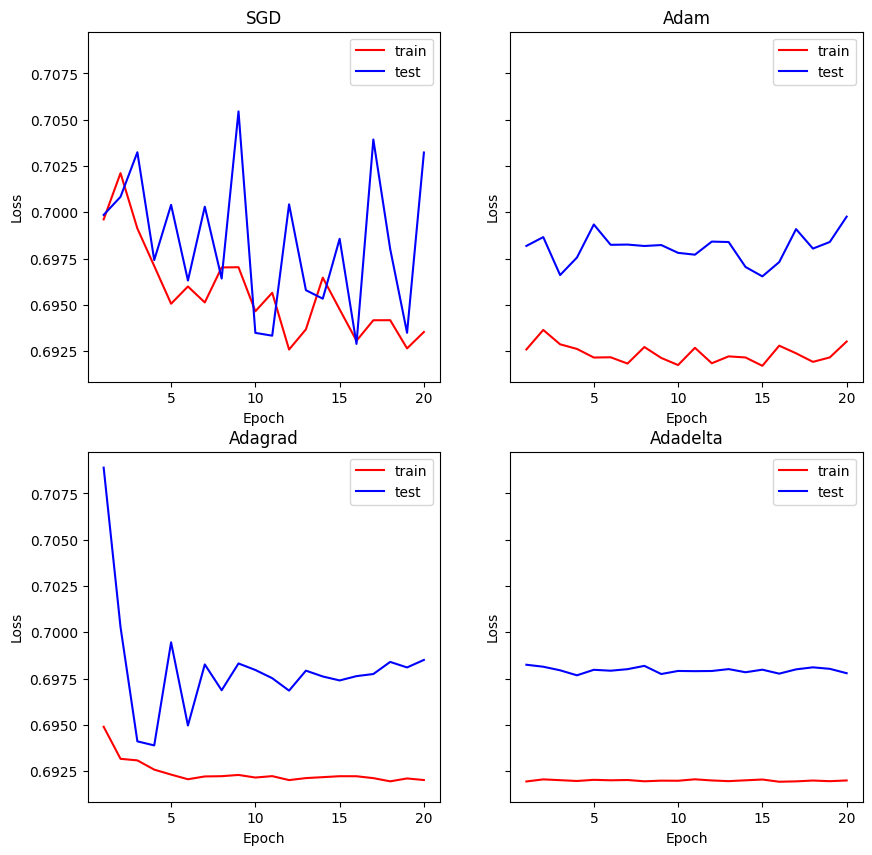

In [7]:
i = 0
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(10, 10), sharey=True)
axs = [ax1, ax2, ax3, ax4]
for i, optim_dict in enumerate(result_dicts):
    axs[i].plot([e for e in range(1, NUM_EPOCHS+1)], optim_dict['train_loss'], c='r', label='train')
    axs[i].plot([e for e in range(1, NUM_EPOCHS+1)], optim_dict['test_loss'], c='b', label='test')
    axs[i].set_xlabel('Epoch')
    axs[i].set_ylabel('Loss')
    axs[i].set_title(optim_names[i])
    axs[i].legend()

plt.savefig('optim_comparison_lr=varying_v1.png')
plt.show()
